In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import r2_score


In [ ]:
data=pd.read_csv("/content/gdrive/MyDrive/sheet2 - sheet2.csv")

In [ ]:
data = data.drop(['S. No.','Dmax, mm',"Shear box size (L x W, mm)","Relative density (Dense = D; Medium Dense = MD; Loose = L)",'Relative Density, %','ram','D10 (mm)','D30 (mm)','D60 (mm)','S_B_D'],axis=1)

In [ ]:
import pandas as pd

def convert_values(value):
    if value == "loose":
        return 1
    elif value == "medium":
        return 2
    elif value == "dense":
        return 3

# Convert the values in the "column_name" column using the function
data["R_D(%)"] = data["R_D(%)"].apply(convert_values)

In [ ]:
data_min_max = data.copy()
data_mean_variance = data.copy()

In [ ]:
import numpy as np


# calculate mean and standard deviation of the data
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)

# normalize the df using Z-score normalization
df = (data - mean) / std_dev




In [ ]:
y= df["P_S_S, kPa"]
x = df.drop(["P_S_S, kPa"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
    test_size=0.2, shuffle = True, random_state = 0)

In [ ]:
rf = RandomForestRegressor()
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5]}
grid_rf = GridSearchCV(rf, param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_rf.fit(x_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(x_train)




model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
# Train the first layer on the training data
model.fit(x_train, y_pred_rf, epochs=50, batch_size=32, verbose=0)

# Use the output of the first layer as input to the second layer
y_pred_ann = model.predict(x_train)

# Use grid search to tune hyperparameters for the SVR model
svr = SVR()
param_grid_svr = {'C': [0.01, 0.1, 1, 10], 'epsilon': [0.01, 0.1, 1, 10]}
grid_svr = GridSearchCV(svr, param_grid_svr, scoring='neg_mean_squared_error', cv=5)
grid_svr.fit(x_train, y_pred_ann)
best_svr = grid_svr.best_estimator_
y_train_svr = grid_svr.predict(x_train)

# Use grid search to tune hyperparameters for the XGBoost model
xgb = XGBRegressor()
param_grid_xgb = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5],'learning_rate':[0.1,0.5,0.9]}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='neg_mean_squared_error', cv=5)
grid_xgb.fit(x_train, y_train_svr)
best_xgb = grid_xgb.best_estimator_
y_pred_final = grid_xgb.predict(x_train)



# # Calculate the root mean squared error of the ensemble model for testing data
# rmse_ensemble_test = np.sqrt(mean_squared_error(y_test, y_pred_rf))
# print("RMSE of the ensemble model (testing): ", rmse_ensemble_test)


rmse_ensemble_train = np.sqrt(mean_squared_error(y_train, y_pred_final))
print("RMSE of the ensemble model (training): ", rmse_ensemble_train)

8/8 [==============================] - 0s 3ms/step
RMSE of the ensemble model (training):  0.36429898156129004


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
# Create Random Forest Regressor object and fit the training data
# Define the model architecture
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor


# Create Random Forest Regressor object and fit the training data
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
# Train the first layer on the training data
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)

# Use the output of the first layer as input to the second layer
y_pred_ann = model.predict(x_test)
X_train2 = model.predict(x_train)

# Use grid search to tune hyperparameters for the SVR model
svr = SVR()
param_grid_svr = {'C': [0.01, 0.1, 1, 10], 'epsilon': [0.01, 0.1, 1, 10]}
grid_svr = GridSearchCV(svr, param_grid_svr, scoring='neg_mean_squared_error', cv=5)
grid_svr.fit(X_train2, y_train)
best_svr = grid_svr.best_estimator_

# Use grid search to tune hyperparameters for the XGBoost model
xgb = XGBRegressor()
param_grid_xgb = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5],'learning_rate':[0.1,0.5,0.9]}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='neg_mean_squared_error', cv=5)
grid_xgb.fit(X_train2, y_train)
best_xgb = grid_xgb.best_estimator_

# Use grid search to tune hyperparameters for the Random Forest model
rf = RandomForestRegressor()
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5]}
grid_rf = GridSearchCV(rf, param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_rf.fit(X_train2, y_train)
best_rf = grid_rf.best_estimator_


# Use the second layer's outputs as input to the Random Forest model
X_test2 = model.predict(x_test)
y_pred_rf = best_rf.predict(X_test2)

# Calculate the root mean squared error of the ensemble model for testing data
rmse_ensemble_test = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RMSE of the ensemble model (testing): ", rmse_ensemble_test)

# Calculate the root mean squared error of the ensemble model for training data
y_pred_train_xgb = best_xgb.predict(X_train2)
y_pred_train_rf = best_rf.predict(X_train2)
rmse_ensemble_train = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
print("RMSE of the ensemble model (training): ", rmse_ensemble_train)



print(r2_score(y_train, y_pred_train_rf))
print(r2_score(y_test, y_pred_rf))

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
    test_size=0.2, shuffle = True, random_state = 0)



from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE
xg = XGBRegressor(objective='reg:squarederror')
xg.fit(x_train,y_train)
pred = xg.predict(x_test)
pred2= xg.predict(x_train)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE  for xgboost testing: % f" %(rmse))
print("rmse for training  xgboost:  ", np.sqrt(MSE(y_train,pred2)))

print("**"*50)

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Create SVR object and fit the training data
svr = SVR(kernel='rbf', C=1, epsilon=0.1)
svr.fit(x_train, y_train)

# Make predictions on the training and test data
y_pred_train = svr.predict(x_train)
y_pred_test = svr.predict(x_test)

# Calculate the root mean squared error for training and test sets
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("RMSE for training set svr: ", rmse_train)
print("RMSE for test set svr  :   ", rmse_test)




print("**"*50)

from sklearn.ensemble import RandomForestRegressor


# Create Random Forest Regressor object and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Make predictions on the training and test data
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# Calculate the root mean squared error for training and test sets
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("RMSE for training set for random forest: ", rmse_train)
print("RMSE for test set for random forest : ", rmse_test)

print("**"*50)


import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model on the training data
model.fit(x_train, y_train, epochs=50, batch_size=8, verbose=0)

# Make predictions on the training and test data
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Calculate the root mean squared error for training and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("RMSE for training set for ANN: ", rmse_train)
print("RMSE for test set for ANN : ", rmse_test)



RMSE  for xgboost testing:  23.699332
rmse for training  xgboost:   2.5454523056186966
****************************************************************************************************
RMSE for training set svr:  121.20067413289073
RMSE for test set svr  :    114.72406007240879
****************************************************************************************************
RMSE for training set for random forest:  15.423120364236413
RMSE for test set for random forest :  23.856497905151876
****************************************************************************************************
2/2 [==============================] - 0s 6ms/step
RMSE for training set for ANN:  57.68630968746623
RMSE for test set for ANN :  30.434104067870738


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error


# Define the architecture of the neural network
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
# Train the first layer on the training data
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)

# Use the output of the first layer as input to the second layer
y_pred_ann = model.predict(x_test)
X_train2 = model.predict(x_train)

# Use grid search to tune hyperparameters for the SVR model
svr = SVR()
param_grid_svr = {'C': [0.01, 0.1, 1, 10], 'epsilon': [0.01, 0.1, 1, 10]}
grid_svr = GridSearchCV(svr, param_grid_svr, scoring='neg_mean_squared_error', cv=5)
grid_svr.fit(X_train2, y_train)
best_svr = grid_svr.best_estimator_

# Use grid search to tune hyperparameters for the XGBoost model
xgb = XGBRegressor()
param_grid_xgb = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5],'learning_rate':[0.1,0.5,0.9]}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='neg_mean_squared_error', cv=5)
grid_xgb.fit(X_train2, y_train)
best_xgb = grid_xgb.best_estimator_

# Use grid search to tune hyperparameters for the Random Forest model
rf = RandomForestRegressor()
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5]}
grid_rf = GridSearchCV(rf, param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_rf.fit(X_train2, y_train)
best_rf = grid_rf.best_estimator_

# Use the second layer's outputs as input to the XGBoost model
X_test2 = model.predict(x_test)
y_pred_xgb = best_xgb.predict(X_test2)

# Use the second layer's outputs as input to the Random Forest model
y_pred_rf = best_rf.predict(X_test2)

# Combine the predictions of the SVR, XGBoost, and Random Forest models
y_pred_ensemble = (y_pred_xgb + y_pred_rf + best_svr.predict(X_test2)) / 3

# Calculate the root mean squared error of the ensemble model for testing data
rmse_ensemble_test = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
print("RMSE of the ensemble model (testing): ", rmse_ensemble_test)

y_pred_train_xgb = grid_xgb.predict(X_train2)
y_pred_train_rf = grid_rf.predict(X_train2)
y_pred_train_svr = grid_svr.predict(X_train2)
y_pred_ensemble_train = (y_pred_train_xgb + y_pred_train_rf + y_pred_train_svr) / 3
rmse_ensemble_train = np.sqrt(mean_squared_error(y_train, y_pred_ensemble_train))
print("RMSE of the ensemble model (training): ", rmse_ensemble_train)


2/2 [==============================] - 0s 5ms/step
RMSE of the ensemble model (testing):  40.47592463179632
RMSE of the ensemble model (training):  57.61285123060776


In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
# Train the first layer on the training data
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)

# Use the output of the first layer as input to the second layer
y_pred_ann = model.predict(x_test)
X_train2 = model.predict(x_train)

# Use grid search to tune hyperparameters for the SVR model
svr = SVR()
param_grid_svr = {'C': [0.01, 0.1, 1, 10], 'epsilon': [0.01, 0.1, 1, 10]}
grid_svr = GridSearchCV(svr, param_grid_svr, scoring='neg_mean_squared_error', cv=5)
grid_svr.fit(X_train2, y_train)
best_svr = grid_svr.best_estimator_

# Use grid search to tune hyperparameters for the XGBoost model
xgb = XGBRegressor()
param_grid_xgb = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5],'learning_rate':[0.1,0.5,0.9]}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='neg_mean_squared_error', cv=5)
grid_xgb.fit(X_train2, y_train)
best_xgb = grid_xgb.best_estimator_

# Use grid search to tune hyperparameters for the Random Forest model
rf = RandomForestRegressor()
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5]}
grid_rf = GridSearchCV(rf, param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_rf.fit(X_train2, y_train)
best_rf = grid_rf.best_estimator_


# Use the second layer's outputs as input to the Random Forest model
X_test2 = model.predict(x_test)
y_pred_rf = best_rf.predict(X_test2)

# Calculate the root mean squared error of the ensemble model for testing data
rmse_ensemble_test = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RMSE of the ensemble model (testing): ", rmse_ensemble_test)

# Calculate the root mean squared error of the ensemble model for training data
y_pred_train_xgb = best_xgb.predict(X_train2)
y_pred_train_rf = best_rf.predict(X_train2)
rmse_ensemble_train = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
print("RMSE of the ensemble model (training): ", rmse_ensemble_train)

2/2 [==============================] - 0s 3ms/step
RMSE of the ensemble model (testing):  34.27496756783602
RMSE of the ensemble model (training):  51.38494826878174


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# create a MinMaxScaler object
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [ ]:
df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [ ]:
df

,D50(mm),Cu,Cc,"N_S, kPa",R_D(%),"P_S_S, kPa"
0,0.11,0.07,0.34,0.53,1.00,0.37
1,0.11,0.07,0.34,0.26,1.00,0.19
2,0.11,0.07,0.34,0.13,1.00,0.11
3,0.11,0.07,0.34,0.06,1.00,0.05
4,0.11,0.07,0.34,0.03,1.00,0.02
...,...,...,...,...,...,...
304,0.32,0.48,0.11,0.05,1.00,0.07
305,0.32,0.48,0.11,0.11,1.00,0.12
306,0.32,0.48,0.11,0.22,1.00,0.24
307,0.32,0.48,0.11,0.44,1.00,0.41


In [ ]:
y= df["P_S_S, kPa"]
x = df.drop(["P_S_S, kPa"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
    test_size=0.2, shuffle = True, random_state = 0)







reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

print(models)















































In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE
xg = XGBRegressor(objective='reg:squarederror', learning_rate=0.5)
xg.fit(x_train,y_train)
pred = xg.predict(x_test)
pred2= xg.predict(x_train)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))
print(np.sqrt(MSE(y_train,pred2)))

RMSE :  0.020044
0.003655723676956677


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Create SVR object and fit the training data
svr = SVR(kernel='rbf', C=1, epsilon=0.1)
svr.fit(x_train, y_train)

# Make predictions on the training and test data
y_pred_train = svr.predict(x_train)
y_pred_test = svr.predict(x_test)

# Calculate the root mean squared error for training and test sets
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("RMSE for training set: ", rmse_train)
print("RMSE for test set: ", rmse_test)


RMSE for training set:  0.0802116909157813
RMSE for test set:  0.06526701007622177


In [ ]:
from sklearn.ensemble import RandomForestRegressor


# Create Random Forest Regressor object and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Make predictions on the training and test data
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# Calculate the root mean squared error for training and test sets
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("RMSE for training set: ", rmse_train)
print("RMSE for test set: ", rmse_test)

RMSE for training set:  0.019292330726864215
RMSE for test set:  0.030668314251379475


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model on the training data
model.fit(x_train, y_train, epochs=50, batch_size=8, verbose=0)

# Make predictions on the training and test data
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Calculate the root mean squared error for training and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("RMSE for training set: ", rmse_train)
print("RMSE for test set: ", rmse_test)


2/2 [==============================] - 0s 10ms/step
RMSE for training set:  0.056613608647415006
RMSE for test set:  0.035447827485322964


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error


# Define the architecture of the neural network
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
# Train the first layer on the training data
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)

# Use the output of the first layer as input to the second layer
y_pred_ann = model.predict(x_test)
X_train2 = model.predict(x_train)

# Use grid search to tune hyperparameters for the SVR model
svr = SVR()
param_grid_svr = {'C': [0.01, 0.1, 1, 10], 'epsilon': [0.01, 0.1, 1, 10]}
grid_svr = GridSearchCV(svr, param_grid_svr, scoring='neg_mean_squared_error', cv=5)
grid_svr.fit(X_train2, y_train)
best_svr = grid_svr.best_estimator_

# Use grid search to tune hyperparameters for the XGBoost model
xgb = XGBRegressor()
param_grid_xgb = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5],'learning_rate':[0.1,0.5,0.9]}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='neg_mean_squared_error', cv=5)
grid_xgb.fit(X_train2, y_train)
best_xgb = grid_xgb.best_estimator_

# Use grid search to tune hyperparameters for the Random Forest model
rf = RandomForestRegressor()
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5]}
grid_rf = GridSearchCV(rf, param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_rf.fit(X_train2, y_train)
best_rf = grid_rf.best_estimator_

# Use the second layer's outputs as input to the XGBoost model
X_test2 = model.predict(x_test)
y_pred_xgb = best_xgb.predict(X_test2)

# Use the second layer's outputs as input to the Random Forest model
y_pred_rf = best_rf.predict(X_test2)

# Combine the predictions of the SVR, XGBoost, and Random Forest models
y_pred_ensemble = (y_pred_xgb + y_pred_rf + best_svr.predict(X_test2)) / 3

# Calculate the root mean squared error of the ensemble model for testing data
rmse_ensemble_test = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
print("RMSE of the ensemble model (testing): ", rmse_ensemble_test)

y_pred_train_xgb = grid_xgb.predict(X_train2)
y_pred_train_rf = grid_rf.predict(X_train2)
y_pred_train_svr = grid_svr.predict(X_train2)
y_pred_ensemble_train = (y_pred_train_xgb + y_pred_train_rf + y_pred_train_svr) / 3
rmse_ensemble_train = np.sqrt(mean_squared_error(y_train, y_pred_ensemble_train))
print("RMSE of the ensemble model (training): ", rmse_ensemble_train)


2/2 [==============================] - 0s 14ms/step
RMSE of the ensemble model (testing):  0.03863471612936254
RMSE of the ensemble model (training):  0.04937379975328152


In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
# Train the first layer on the training data
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)

# Use the output of the first layer as input to the second layer
y_pred_ann = model.predict(x_test)
X_train2 = model.predict(x_train)

# Use grid search to tune hyperparameters for the SVR model
svr = SVR()
param_grid_svr = {'C': [0.01, 0.1, 1, 10], 'epsilon': [0.01, 0.1, 1, 10]}
grid_svr = GridSearchCV(svr, param_grid_svr, scoring='neg_mean_squared_error', cv=5)
grid_svr.fit(X_train2, y_train)
best_svr = grid_svr.best_estimator_

# Use grid search to tune hyperparameters for the XGBoost model
xgb = XGBRegressor()
param_grid_xgb = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5],'learning_rate':[0.1,0.5,0.9]}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='neg_mean_squared_error', cv=5)
grid_xgb.fit(X_train2, y_train)
best_xgb = grid_xgb.best_estimator_

# Use grid search to tune hyperparameters for the Random Forest model
rf = RandomForestRegressor()
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5]}
grid_rf = GridSearchCV(rf, param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_rf.fit(X_train2, y_train)
best_rf = grid_rf.best_estimator_


# Use the second layer's outputs as input to the Random Forest model
X_test2 = model.predict(x_test)
y_pred_rf = best_rf.predict(X_test2)

# Calculate the root mean squared error of the ensemble model for testing data
rmse_ensemble_test = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RMSE of the ensemble model (testing): ", rmse_ensemble_test)

# Calculate the root mean squared error of the ensemble model for training data
y_pred_train_xgb = best_xgb.predict(X_train2)
y_pred_train_rf = best_rf.predict(X_train2)
rmse_ensemble_train = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
print("RMSE of the ensemble model (training): ", rmse_ensemble_train)

2/2 [==============================] - 0s 5ms/step
RMSE of the ensemble model (testing):  0.031152348845510113
RMSE of the ensemble model (training):  0.05580409771733075


In [ ]:
data.describe()


,D50(mm),Cu,Cc,"N_S, kPa",R_D(%),"P_S_S, kPa"
count,309.00,309.00,309.00,309.00,309.00,309.00
mean,0.56,4.01,1.04,136.90,2.34,121.44
std,0.41,2.71,0.29,157.03,0.92,131.63
min,0.09,1.07,0.34,4.00,1.00,2.20
25%,0.25,2.20,0.91,40.00,1.00,33.90
50%,0.44,3.12,1.00,100.00,3.00,78.50
75%,0.81,5.50,1.12,200.00,3.00,152.80
max,2.18,15.20,2.03,910.00,3.00,800.40


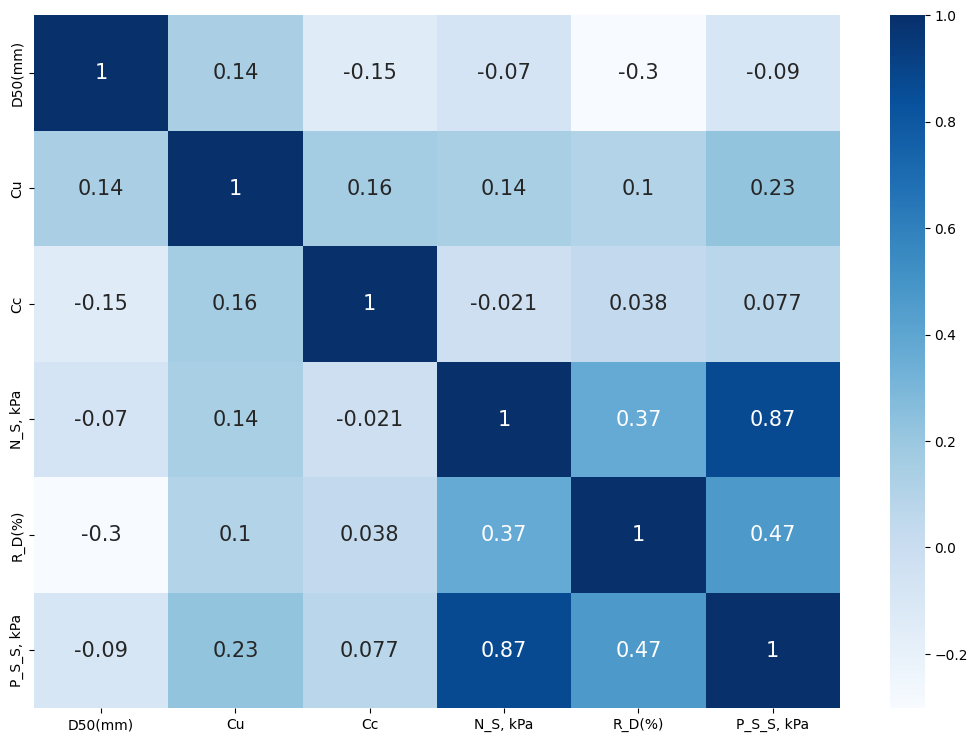

In [ ]:
import pandas as pd
import seaborn as sb
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
plt.figure(figsize = (13,9))
svm=sb.heatmap(data.corr(method='spearman',min_periods=100),annot=True,cmap='Blues',xticklabels=True, yticklabels=True,annot_kws={"size": 15})
figure = svm.get_figure()
sb.set_context(font_scale=10)
sb.set(font_scale=1.8)
plt.show()

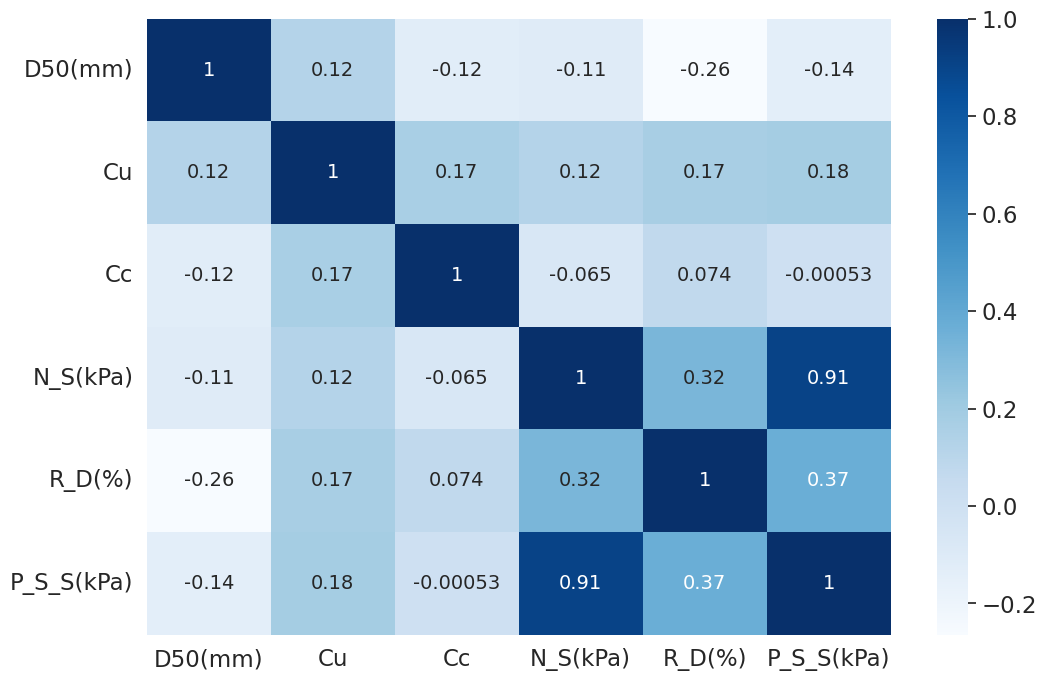

In [ ]:
data.columns =['D50(mm)','Cu','Cc','N_S(kPa)', 'R_D(%)', 'P_S_S(kPa)']
plt.figure(figsize = (12,8))
svm=sb.heatmap(data.corr(method='pearson',min_periods=100),annot=True,cmap='Blues',xticklabels=True, yticklabels=True,annot_kws={"size": 14})
figure = svm.get_figure()
sb.set_context(font_scale=10)
sb.set(font_scale=1.5)
plt.show()

figure.savefig('heat_map_excluding_box.png', dpi=1000)

In [ ]:
data

,D50(mm),Cu,Cc,"N_S, kPa",R_D(%),"P_S_S, kPa"
0,0.31,2.06,0.92,480.00,3,300.50
1,0.31,2.06,0.92,240.00,3,156.50
2,0.31,2.06,0.92,120.00,3,88.10
3,0.31,2.06,0.92,60.00,3,43.70
4,0.31,2.06,0.92,30.00,3,18.20
...,...,...,...,...,...,...
304,0.75,7.86,0.53,50.00,3,58.40
305,0.75,7.86,0.53,100.00,3,100.30
306,0.75,7.86,0.53,200.00,3,190.80
307,0.75,7.86,0.53,400.00,3,331.00


In [ ]:
import numpy as np


# calculate mean and standard deviation of the data
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)

# normalize the df using Z-score normalization
normalized_df = (data - mean) / std_dev

print(normalized_df)


     D50(mm)    Cu    Cc  N_S, kPa  R_D(%)  P_S_S, kPa
0      -0.62 -0.72 -0.40      2.19    0.72        1.36
1      -0.62 -0.72 -0.40      0.66    0.72        0.27
2      -0.62 -0.72 -0.40     -0.11    0.72       -0.25
3      -0.62 -0.72 -0.40     -0.49    0.72       -0.59
4      -0.62 -0.72 -0.40     -0.68    0.72       -0.79
..       ...   ...   ...       ...     ...         ...
304     0.47  1.42 -1.75     -0.55    0.72       -0.48
305     0.47  1.42 -1.75     -0.24    0.72       -0.16
306     0.47  1.42 -1.75      0.40    0.72        0.53
307     0.47  1.42 -1.75      1.68    0.72        1.59
308     0.47  1.42 -1.75      4.23    0.72        3.74

[309 rows x 6 columns]


In [ ]:
data

,D50(mm),Cu,Cc,"N_S, kPa",R_D(%),"P_S_S, kPa"
0,0.31,2.06,0.92,480.0,3,300.5
1,0.31,2.06,0.92,240.0,3,156.5
2,0.31,2.06,0.92,120.0,3,88.1
3,0.31,2.06,0.92,60.0,3,43.7
4,0.31,2.06,0.92,30.0,3,18.2
...,...,...,...,...,...,...
304,0.75,7.86,0.53,50.0,3,58.4
305,0.75,7.86,0.53,100.0,3,100.3
306,0.75,7.86,0.53,200.0,3,190.8
307,0.75,7.86,0.53,400.0,3,331.0


In [ ]:
y= normalized_df["P_S_S, kPa"]
x = normalized_df.drop(["P_S_S, kPa"],axis=1)



In [ ]:
len(y),len(x)

(309, 309)

In [ ]:
normalized_df

,D50(mm),Cu,Cc,"N_S, kPa",R_D(%),"P_S_S, kPa"
0,-0.617941,-0.719441,-0.399313,2.188504,0.724649,1.362557
1,-0.617941,-0.719441,-0.399313,0.657616,0.724649,0.266784
2,-0.617941,-0.719441,-0.399313,-0.107827,0.724649,-0.253709
3,-0.617941,-0.719441,-0.399313,-0.490549,0.724649,-0.591572
4,-0.617941,-0.719441,-0.399313,-0.681910,0.724649,-0.785615
...,...,...,...,...,...,...
304,0.467710,1.422155,-1.752552,-0.554336,0.724649,-0.479712
305,0.467710,1.422155,-1.752552,-0.235401,0.724649,-0.160872
306,0.467710,1.422155,-1.752552,0.402468,0.724649,0.527791
307,0.467710,1.422155,-1.752552,1.678208,0.724649,1.594648


NameError: ignored

In [ ]:
y = normalized_df['N_S, kPa']


In [ ]:
df =  normalized_df.drop(['N_S, kPa'],axis=1)
df =  df.drop(["P_S_S, kPa"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
    test_size=0.2, shuffle = True, random_state = 0)

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

print(models)

 24%|██▍       | 10/42 [00:00<00:01, 22.64it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 62%|██████▏   | 26/42 [00:01<00:01, 15.11it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.


100%|██████████| 42/42 [00:04<00:00,  8.98it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
XGBRegressor                                 0.98       0.98  0.15        0.20
GradientBoostingRegressor                    0.97       0.97  0.17        0.16
BaggingRegressor                             0.97       0.97  0.17        0.03
NuSVR                                        0.97       0.97  0.17        0.03
SVR                                          0.97       0.97  0.18        0.02
RandomForestRegressor                        0.96       0.97  0.18        0.30
RANSACRegressor                              0.95       0.96  0.21        0.12
LinearSVR                                    0.95       0.95  0.21        0.01
HuberRegressor                               0.95       0.95  0.21        0.02
MLPRegressor                                 0.95       0.95  0.22        0.41
KernelRidge                                  0.94   

In [ ]:

from sklearn.metrics import r2_score

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE
xg = XGBRegressor(objective='reg:squarederror', learning_rate=0.5)
xg.fit(x_train,y_train)
pred = xg.predict(x_test)
pred2= xg.predict(x_train)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))
print(np.sqrt(MSE(y_train,pred2)))

RMSE :  0.165073
0.01915231976212691


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Create SVR object and fit the training data
svr = SVR(kernel='rbf', C=1, epsilon=0.1)
svr.fit(x_train, y_train)

# Make predictions on the training and test data
y_pred_train = svr.predict(x_train)
y_pred_test = svr.predict(x_test)

# Calculate the root mean squared error for training and test sets
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("RMSE for training set: ", rmse_train)
print("RMSE for test set: ", rmse_test)



RMSE for training set:  0.39820802486339774
RMSE for test set:  0.18124817461213458


In [ ]:
from sklearn.ensemble import RandomForestRegressor


# Create Random Forest Regressor object and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Make predictions on the training and test data
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# Calculate the root mean squared error for training and test sets
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("RMSE for training set: ", rmse_train)
print("RMSE for test set: ", rmse_test)


RMSE for training set:  0.11729590511518533
RMSE for test set:  0.18393519028753505


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model on the training data
model.fit(x_train, y_train, epochs=50, batch_size=8, verbose=0)

# Make predictions on the training and test data
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Calculate the root mean squared error for training and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("RMSE for training set: ", rmse_train)
print("RMSE for test set: ", rmse_test)


2/2 [==============================] - 0s 8ms/step
RMSE for training set:  0.2914885778909946
RMSE for test set:  0.20547962381106988


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


# Define the architecture of the neural network
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
# Train the first layer on the training data
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)

# Use the output of the first layer as input to the second layer
y_pred_ann = model.predict(x_test)
X_train2 = model.predict(x_train)

# Create an SVR model and train it on the second layer's outputs
svr = SVR(kernel='rbf')
svr.fit(X_train2, y_train)

# Use the second layer's outputs as input to the XGBoost model
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train2, y_train)
X_test2 = model.predict(x_test)
y_pred_xgb = xgb.predict(X_test2)

# Use the second layer's outputs as input to the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train2, y_train)
y_pred_rf = rf.predict(X_test2)

y_pred_ensemble = (y_pred_xgb + y_pred_rf + svr.predict(X_test2)) / 3

# Calculate the root mean squared error of the ensemble model for testing data
rmse_ensemble_test = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
print("RMSE of the ensemble model (testing): ", rmse_ensemble_test)

# Calculate the root mean squared error of the ensemble model for training data
y_pred_train_xgb = xgb.predict(X_train2)
y_pred_train_rf = rf.predict(X_train2)
y_pred_train_svr = svr.predict(X_train2)
y_pred_ensemble_train = (y_pred_train_xgb + y_pred_train_rf + y_pred_train_svr) / 3
rmse_ensemble_train = np.sqrt(mean_squared_error(y_train, y_pred_ensemble_train))
print("RMSE of the ensemble model (training): ", rmse_ensemble_train)

2/2 [==============================] - 0s 4ms/step
RMSE of the ensemble model (testing):  0.20776384275953375
RMSE of the ensemble model (training):  0.16447777014692222


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error


# Define the architecture of the neural network
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
# Train the first layer on the training data
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)

# Use the output of the first layer as input to the second layer
y_pred_ann = model.predict(x_test)
X_train2 = model.predict(x_train)

# Use grid search to tune hyperparameters for the SVR model
svr = SVR()
param_grid_svr = {'C': [0.01, 0.1, 1, 10], 'epsilon': [0.01, 0.1, 1, 10]}
grid_svr = GridSearchCV(svr, param_grid_svr, scoring='neg_mean_squared_error', cv=5)
grid_svr.fit(X_train2, y_train)
best_svr = grid_svr.best_estimator_

# Use grid search to tune hyperparameters for the XGBoost model
xgb = XGBRegressor()
param_grid_xgb = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5],'learning_rate':[0.1,0.5,0.9]}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='neg_mean_squared_error', cv=5)
grid_xgb.fit(X_train2, y_train)
best_xgb = grid_xgb.best_estimator_

# Use grid search to tune hyperparameters for the Random Forest model
rf = RandomForestRegressor()
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5]}
grid_rf = GridSearchCV(rf, param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_rf.fit(X_train2, y_train)
best_rf = grid_rf.best_estimator_

# Use the second layer's outputs as input to the XGBoost model
X_test2 = model.predict(x_test)
y_pred_xgb = best_xgb.predict(X_test2)

# Use the second layer's outputs as input to the Random Forest model
y_pred_rf = best_rf.predict(X_test2)

# Combine the predictions of the SVR, XGBoost, and Random Forest models
y_pred_ensemble = (y_pred_xgb + y_pred_rf + best_svr.predict(X_test2)) / 3

# Calculate the root mean squared error of the ensemble model for testing data
rmse_ensemble_test = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
print("RMSE of the ensemble model (testing): ", rmse_ensemble_test)

y_pred_train_xgb = grid_xgb.predict(X_train2)
y_pred_train_rf = grid_rf.predict(X_train2)
y_pred_train_svr = grid_svr.predict(X_train2)
y_pred_ensemble_train = (y_pred_train_xgb + y_pred_train_rf + y_pred_train_svr) / 3
rmse_ensemble_train = np.sqrt(mean_squared_error(y_train, y_pred_ensemble_train))
print("RMSE of the ensemble model (training): ", rmse_ensemble_train)


2/2 [==============================] - 0s 7ms/step
RMSE of the ensemble model (testing):  0.18176383858665374
RMSE of the ensemble model (training):  0.2889330479769617


In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
# Train the first layer on the training data
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)

# Use the output of the first layer as input to the second layer
y_pred_ann = model.predict(x_test)
X_train2 = model.predict(x_train)

# Use grid search to tune hyperparameters for the SVR model
svr = SVR()
param_grid_svr = {'C': [0.01, 0.1, 1, 10], 'epsilon': [0.01, 0.1, 1, 10]}
grid_svr = GridSearchCV(svr, param_grid_svr, scoring='neg_mean_squared_error', cv=5)
grid_svr.fit(X_train2, y_train)
best_svr = grid_svr.best_estimator_

# Use grid search to tune hyperparameters for the XGBoost model
xgb = XGBRegressor()
param_grid_xgb = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5],'learning_rate':[0.1,0.5,0.9]}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='neg_mean_squared_error', cv=5)
grid_xgb.fit(X_train2, y_train)
best_xgb = grid_xgb.best_estimator_

# Use grid search to tune hyperparameters for the Random Forest model
rf = RandomForestRegressor()
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5]}
grid_rf = GridSearchCV(rf, param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_rf.fit(X_train2, y_train)
best_rf = grid_rf.best_estimator_


# Use the second layer's outputs as input to the Random Forest model
X_test2 = model.predict(x_test)
y_pred_rf = best_rf.predict(X_test2)

# Calculate the root mean squared error of the ensemble model for testing data
rmse_ensemble_test = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RMSE of the ensemble model (testing): ", rmse_ensemble_test)

# Calculate the root mean squared error of the ensemble model for training data
y_pred_train_xgb = best_xgb.predict(X_train2)
y_pred_train_rf = best_rf.predict(X_train2)
rmse_ensemble_train = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
print("RMSE of the ensemble model (training): ", rmse_ensemble_train)

2/2 [==============================] - 0s 7ms/step
RMSE of the ensemble model (testing):  0.19016698622686543
RMSE of the ensemble model (testing):  0.2427063152870269


In [ ]:
y_x_train  = y_train*std_dev[-1] + mean[-1]

In [ ]:
l=list(pred2)

In [ ]:
predicted=pred2*std_dev[-1] + mean[-1]

In [ ]:

pd.DataFrame(predicted).to_csv("train_predicted.csv")

In [ ]:
y_x_train
y_x_train.to_csv('y_train.csv',index=True)

In [ ]:
r2_test = r2_score(y_test, pred)
r2_test

0.9988618628208297

In [ ]:
r2_train = r2_score(y_train,pred2)
r2_train

0.9993550550757598

In [ ]:
data_test =  pd.read_csv("/content/validation data - validation data.csv")

In [ ]:
normalized_df_test = (data_test - mean) / std_dev


In [ ]:
y_val= normalized_df_test["P_S_S, kPa"]
df_val=normalized_df_test.drop(["P_S_S, kPa"],axis=1)

In [ ]:
pred8= xg.predict(df_val)
rmse = np.sqrt(MSE(y_val, pred8))

In [ ]:
y_val_t = y_val *std_dev[-1] + mean[-1]
pred8_t = pred8*std_dev[-1] + mean[-1]
pd.DataFrame(y_val_t).to_csv("train.csv")
pd.DataFrame(pred8_t).to_csv("test.csv")

In [ ]:
r3=r2_score(y_val,pred8)

In [ ]:
r3

0.9305683254958681

In [ ]:
rmse

0.10330190115294766

<Axes: >

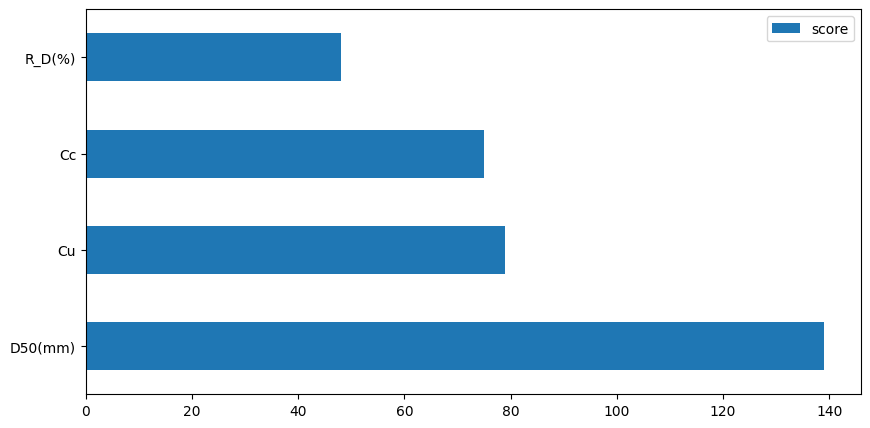

In [ ]:
feature_important = xg.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (10,5)) ## plot top 5 features

In [ ]:
data